In [30]:
import pandas as pd
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Filter Data

In [6]:
# Load the dataset
file_path = 'analysis_data/DATA_ASR.csv'
df = pd.read_csv(file_path)

# Filter and save DALYs data
daly_data = df[df['measure_name'] == 'DALYs (Disability-Adjusted Life Years)']
daly_data.to_csv('analysis_data/DALYs_ASR.csv', index=False)

# Filter and save Incidence data
incidence_data = df[df['measure_name'] == 'Incidence']
incidence_data.to_csv('analysis_data/Incidence_ASR.csv', index=False)

# Filter and save Prevalence data
prevalence_data = df[df['measure_name'] == 'Prevalence']
prevalence_data.to_csv('analysis_data/Prevalence_ASR.csv', index=False)

In [7]:
# Load the dataset
file_path = 'analysis_data/DATA_ASR_GENDERED.csv'
df = pd.read_csv(file_path)
df = df.sort_values(by='year')

#Filter and save DALYs data
daly_data = df[df['measure_name'] == 'DALYs (Disability-Adjusted Life Years)']
daly_data.to_csv('analysis_data/DALYs_ASR_GENDERED.csv', index=False)
# Filter and save Incidence data
incidence_data = df[df['measure_name'] == 'Incidence']
incidence_data.to_csv('analysis_data/Incidence_ASR_GENDERED.csv', index=False)

# Filter and save Prevalence data
prevalence_data = df[df['measure_name'] == 'Prevalence']
prevalence_data.to_csv('analysis_data/Prevalence_ASR_GENDERED.csv', index=False)


In [11]:
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] == 22]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
df.to_csv('analysis_data/DALY_ASR.csv', index=False)

In [7]:
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] == 27]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
df.to_csv('analysis_data/DALY_ASDR.csv', index=False)

ARIMA


In [41]:
# Forecast to 2050
# Forecast to 2050


# Load the dataset
file_path = 'analysis_data/Incidence_ASR.csv'
df = pd.read_csv(file_path)

# Filter the data for Schizophrenia and prepare time-series data
schizophrenia_data = df
schizophrenia_data = schizophrenia_data[schizophrenia_data['cause_name'] == 'Schizophrenia'][['year', 'val']]
schizophrenia_data = schizophrenia_data.sort_values(by='year')
schizophrenia_data.set_index('year', inplace=True)

<Axes: xlabel='year'>

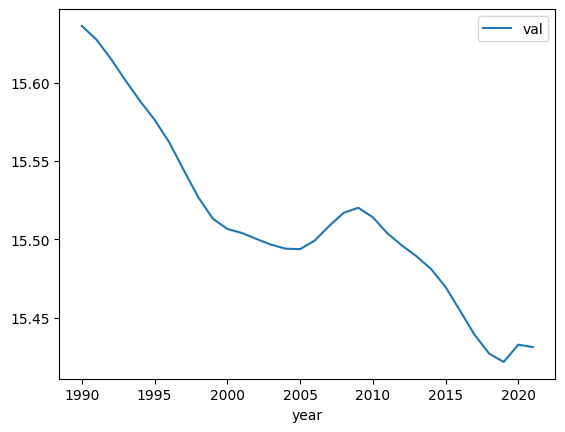

In [42]:
schizophrenia_data.plot()

ADF test for stationarity \
(Automated for finding the best differencing order)\


Differencing Order: 0, ADF Statistic: -1.9101819018139998, p-value: 0.3272864874937128
Differencing Order: 1, ADF Statistic: -1.2076286830957743, p-value: 0.6703054657008369
Differencing Order: 2, ADF Statistic: -1.4615294675906716, p-value: 0.5524491355695471
Differencing Order: 3, ADF Statistic: -2.7816349675663883, p-value: 0.060945345601334196
Differencing Order: 4, ADF Statistic: -1.6186115587049839, p-value: 0.47345727931548637
Differencing Order: 5, ADF Statistic: -2.949430574738573, p-value: 0.039894476571599925
Stationary at differencing order 5.


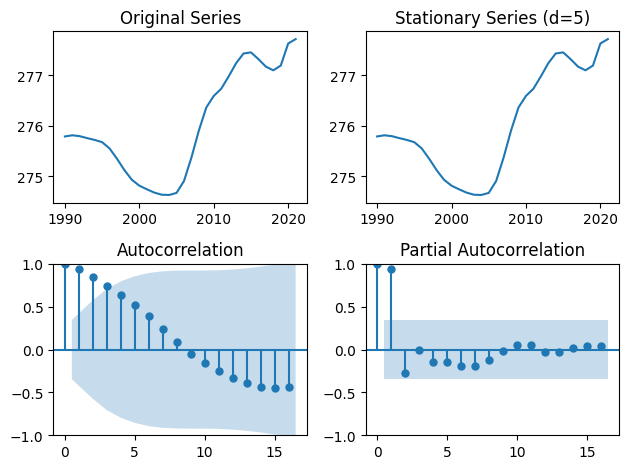

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def find_best_difference(series, max_diff=10):
    """
    Automatically find the best differencing order for stationarity using ADF test.

    Parameters:
        series (pd.Series): Time-series data.
        max_diff (int): Maximum number of differencing steps to try.

    Returns:
        int: Best differencing order.
        pd.Series: Differenced series.
    """
    for d in range(max_diff + 1):
        if d == 0:
            test_series = series
        else:
            test_series = series.diff(d).dropna()

        adf_result = adfuller(test_series)
        p_value = adf_result[1]

        print(f"Differencing Order: {d}, ADF Statistic: {adf_result[0]}, p-value: {p_value}")

        if p_value <= 0.05:
            print(f"Stationary at differencing order {d}.")
            return d, test_series

    print("Series is non-stationary even after maximum differencing.")
    return None, None

# Example usage
file_path = 'analysis_data/Prevalence_ASR.csv'

df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df
best_diff_order, stationary_series = find_best_difference(schizophrenia_data)

stationary_series = schizophrenia_data
# Plot the stationary series
fig, ax = plt.subplots(2,2)
ax[0, 0].plot(schizophrenia_data, label='Original Series')
ax[0, 0].set_title('Original Series')
ax[0, 1].plot(stationary_series, label='Stationary Series')
ax[0, 1].set_title(f'Stationary Series (d={best_diff_order})')
ax[1, 0].set_title('ACF of Original Series')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stationary_series, ax=ax[1, 0])
ax[1, 1].set_title('PACF of Stationary Series')
plot_pacf(stationary_series, ax=ax[1, 1])
plt.tight_layout()

In [94]:
import pmdarima as pm

model_auto = pm.auto_arima(schizophrenia_data,
                      start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      seasonal=False,
                      d=None,          # Auto-difference
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6.019, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-34.279, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31.358, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5.314, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-36.763, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-35.826, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-35.383, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-37.219, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-34.373, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-38.897, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-35.855, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-37.033, Time=0.25 

Processing file: analysis_data/Prevalence_ASR.csv
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6.019, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-34.279, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31.358, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5.314, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-36.763, Time=0.86 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-35.826, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-35.383, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-37.219, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-34.373, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-38.897, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-35.855, Time=0.01 sec
 ARIMA(2,1,

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


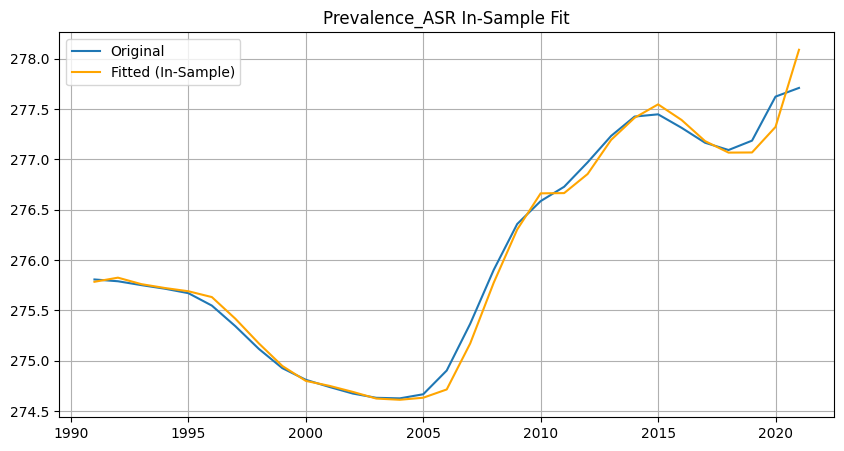

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

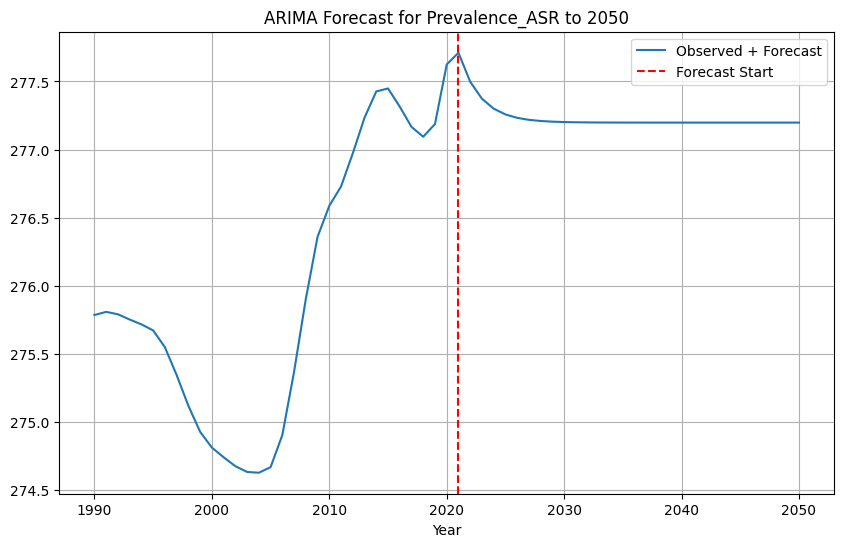

Processing file: analysis_data/Incidence_ASR.csv
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-209.091, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-235.385, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-233.201, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-194.246, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-237.602, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-235.777, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-235.171, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-237.152, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-233.561, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-235.293, Time=0.03 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.645 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:       

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 640x480 with 0 Axes>

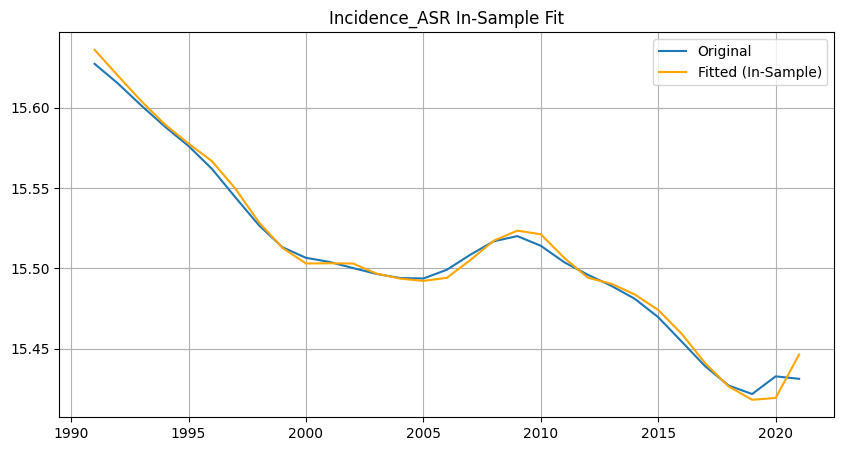

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

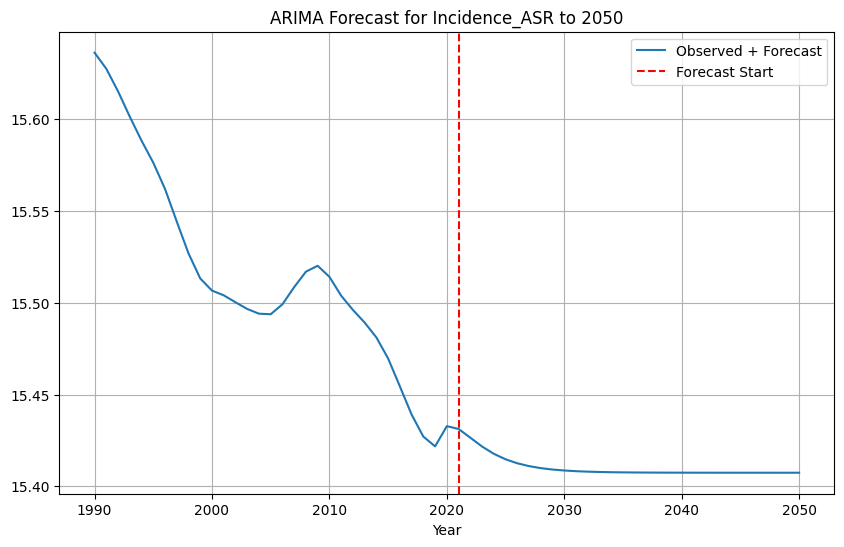

Processing file: analysis_data/DALYs_ASR.csv
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-28.919, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-63.873, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-54.242, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28.920, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-67.861, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-66.535, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-66.252, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-67.485, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-64.642, Time=0.82 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-69.776, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-65.865, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-68.489, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-68.184, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-69.452, Time=0.04 sec
 A

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 640x480 with 0 Axes>

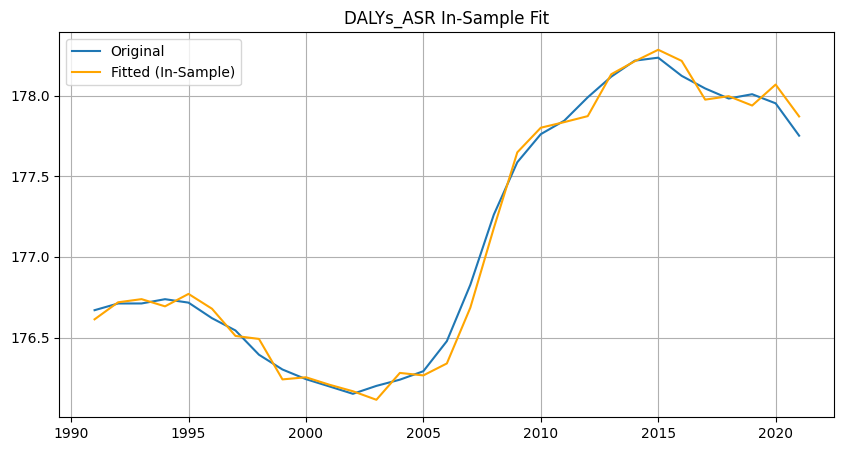

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

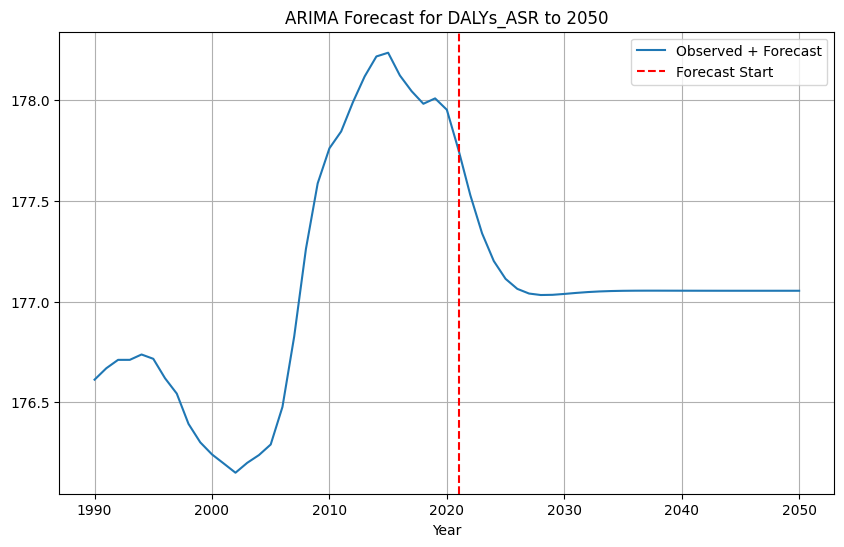

Processing file: analysis_data/Prevalence_CASES.csv
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=734.511, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=868.594, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=736.505, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=873.945, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=795.025, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.164 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -365.256
Date:                Thu, 19 Jun 2025   AIC                            734.511
Time:                        08:38:41   BIC                            737.379
Sample:                             0   HQIC                           735.446
                             

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 640x480 with 0 Axes>

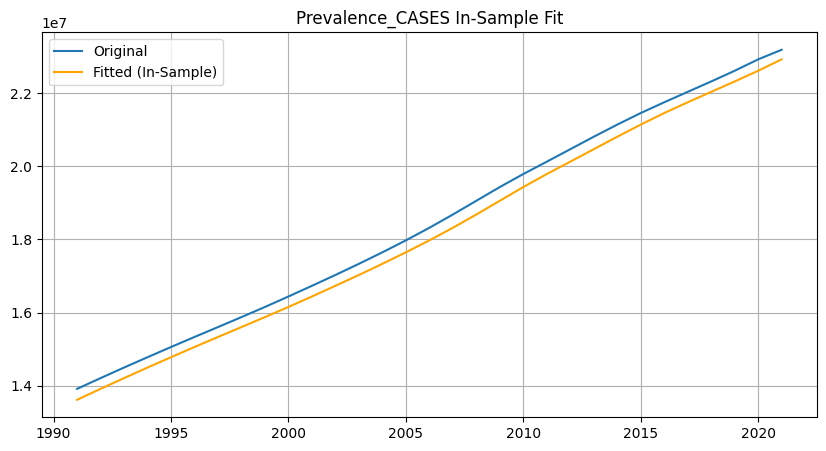

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

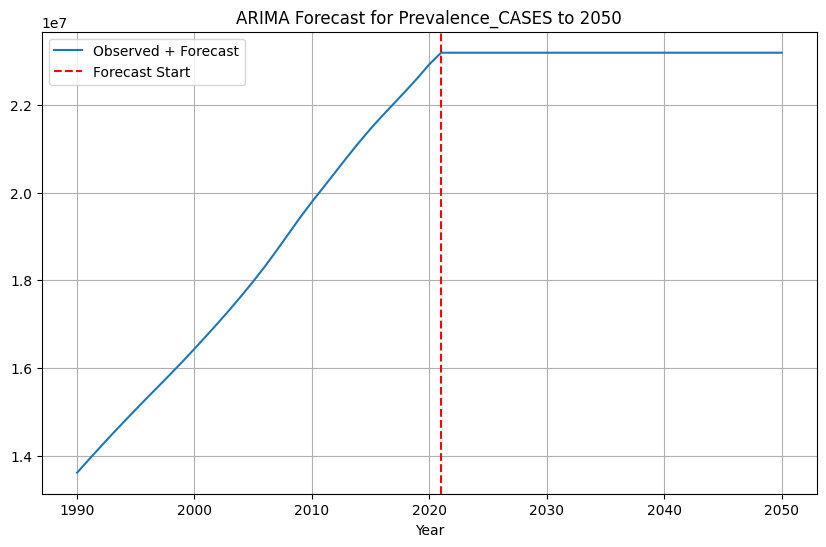

Processing file: analysis_data/Incidence_CASES.csv
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=494.396, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=503.141, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=498.003, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=494.533, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=501.483, Time=0.27 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.342 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -245.198
Date:                Thu, 19 Jun 2025   AIC                            494.396
Time:                        08:38:42   BIC                            497.198
Sample:                             0   HQIC                           495.292
                              

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 640x480 with 0 Axes>

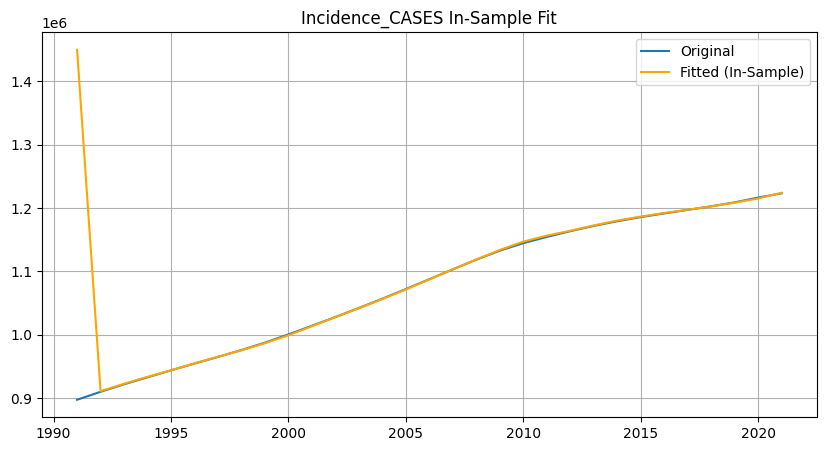

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

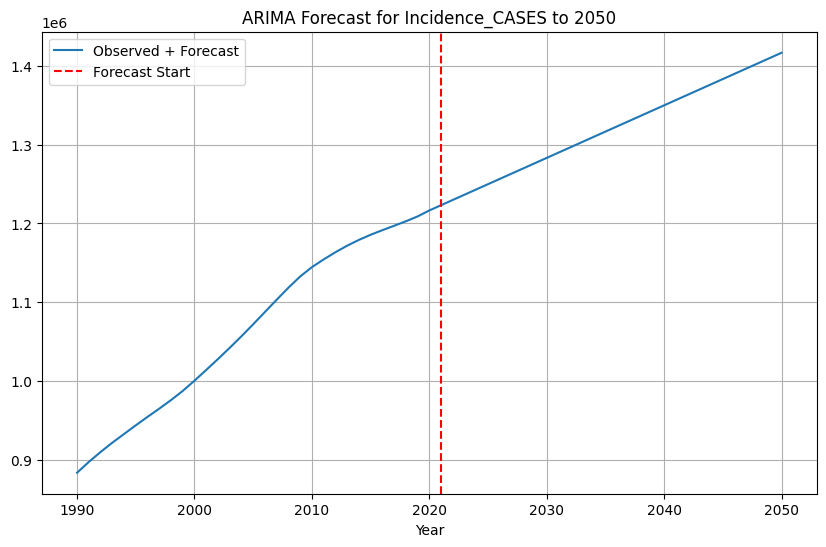

Processing file: analysis_data/DALYs_CASES.csv
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=714.300, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16073.530, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=716.388, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.714, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2346.753, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.769 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -355.150
Date:                Thu, 19 Jun 2025   AIC                            714.300
Time:                        08:38:43   BIC                            717.168
Sample:                             0   HQIC                           715.235
                               

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 640x480 with 0 Axes>

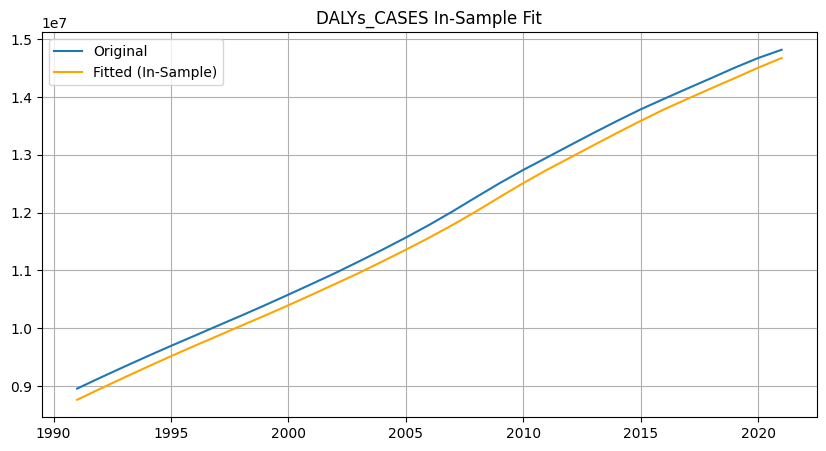

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

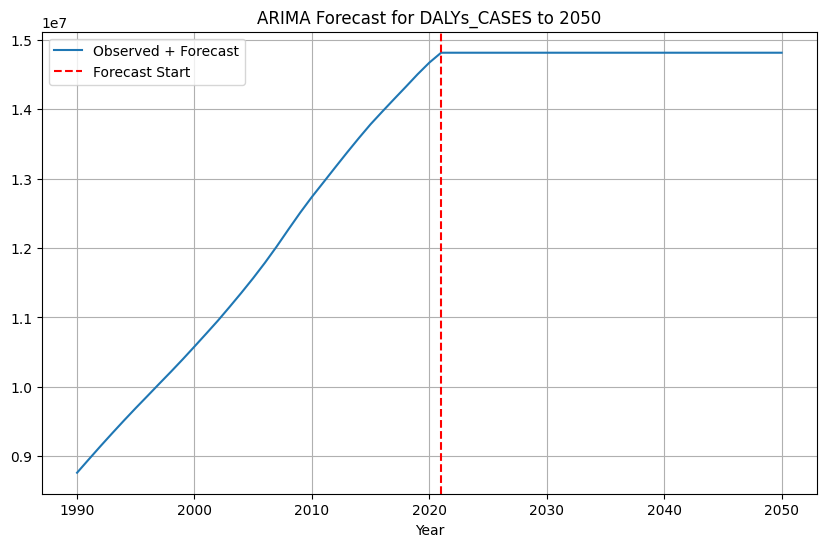

<Figure size 640x480 with 0 Axes>

In [98]:
import pmdarima as pm

# Read data
file_paths = ['analysis_data/Prevalence_ASR.csv', 'analysis_data/Incidence_ASR.csv', 'analysis_data/DALYs_ASR.csv',
              'analysis_data/Prevalence_CASES.csv', 'analysis_data/Incidence_CASES.csv', 'analysis_data/DALYs_CASES.csv']

for file_path in file_paths:
    print(f"Processing file: {file_path}")
    file_name = file_path.split('/')[-1].split('.')[0]
    df = pd.read_csv(file_path)
    df = df[df['sex_id'] == 3][['year', 'val']].dropna()
    df = df.sort_values(by='year')
    df = df.set_index('year')
    schizophrenia_data = df

    # Fit ARIMA model using auto_arima
    model_auto = pm.auto_arima(schizophrenia_data,
                          start_p=0, start_q=0,
                          max_p=5, max_q=5,
                          seasonal=False,
                          d=None,          # Auto-difference
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

    print(model_auto.summary())

    # Save summary to a .txt file
    with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
        f.write(str(model_auto.summary()))

    # Fit the model
    model = ARIMA(schizophrenia_data, order=model_auto.order)
    model_fit = model.fit()
    # Print model summary
    print(model_fit.summary())
    fitted_values = model_fit.fittedvalues

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(schizophrenia_data[1:], label='Original')
    plt.plot(fitted_values[1:], label='Fitted (In-Sample)', color='orange')
    plt.title(f'{file_name} In-Sample Fit')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')
    # Forecast to 2050
    forecast_years = list(range(2022, 2051))
    forecast = model_fit.get_forecast(steps=len(forecast_years))
    forecast_values = forecast.predicted_mean
    # Combine forecast with original data
    forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
    combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
    plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.title(f'ARIMA Forecast for {file_name} to 2050')
    plt.legend()
    plt.grid()
    plt.show()
    plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')


ADF Statistic: -0.9118343672316622
p-value: 0.7840502122111066
The series is non-stationary; differencing may be needed.


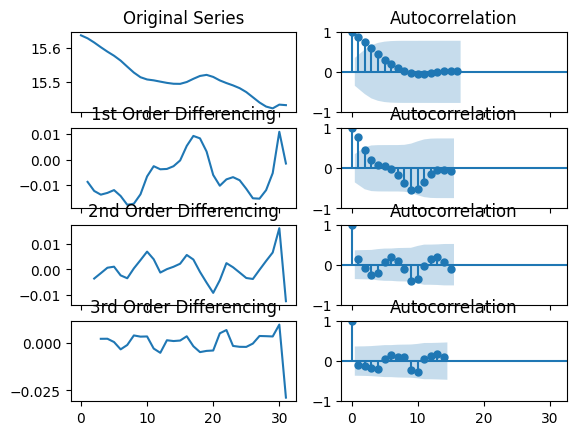

In [44]:
from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test to check for stationarity
schizophrenia_data = schizophrenia_data.reset_index(drop=True)
result = adfuller(schizophrenia_data.diff(2).dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# If p-value > 0.05, the series is non-stationary; differencing may be needed
if result[1] > 0.05:
    print("The series is non-stationary; differencing may be needed.")
else:
    print("The series is stationary; no differencing needed.")

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(schizophrenia_data.val); axes[0, 0].set_title('Original Series')
plot_acf(schizophrenia_data.val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(schizophrenia_data.val.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(schizophrenia_data.val.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(schizophrenia_data.val.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(schizophrenia_data.val.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(schizophrenia_data.val.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(schizophrenia_data.val.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

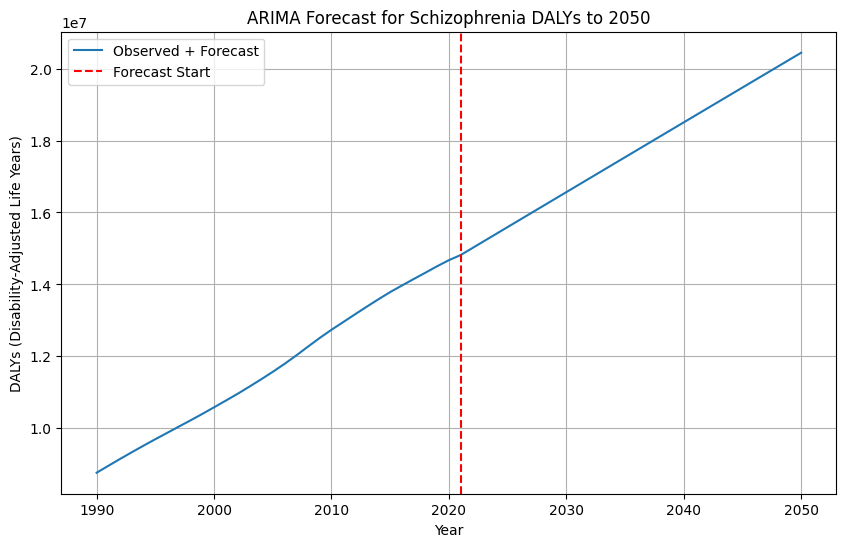

In [12]:

# Fit ARIMA model
model = ARIMA(schizophrenia_data, order=(1, 1, 1))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean

# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('DALYs (Disability-Adjusted Life Years)')
plt.title('ARIMA Forecast for Schizophrenia DALYs to 2050')
plt.legend()
plt.grid()
plt.show()

# Save the forecast data
forecast_df.to_csv('analysis_data/DALYs_CASES_forecast_2050.csv', index=False)